In [27]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import log_loss, accuracy_score, mean_squared_error as mse
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
names = ["f" + str(i) for i in range(13)] + ["class"]

In [7]:
df = pd.read_fwf('housing_Bostondata.csv', names = names)

In [8]:
df.head(10)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,class
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [17]:
scaler = MinMaxScaler()
housing = scaler.fit_transform(df)

In [18]:
X, y = housing[:, :-1], housing[:, -1]
print(X.shape, y.shape)


(506, 13) (506,)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=24)


### Mean Square Error loss function:

In [30]:
mse = Sequential([
    Dense(units=16, input_dim= X.shape[1], activation="relu"),
    Dense(units=8, activation="relu"),
    Dense(units=1)
])
mse.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 16)                224       
                                                                 
 dense_15 (Dense)            (None, 8)                 136       
                                                                 
 dense_16 (Dense)            (None, 1)                 9         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [31]:
mse.compile(
    optimizer="rmsprop",
    loss="mse",
    metrics=["mae"]
)

In [32]:
history_mse = mse.fit(X_train, y_train, epochs=15, verbose=0, validation_split=0.2)


In [33]:
def plot_history(history, metrics, model_name:str):
    fig = plt.figure(figsize=[8, 4])
    for metric in metrics:
        plt.plot(history.history[metric], label='train '+ metric)
        plt.plot(history.history['val_' + metric], label='val ' + metric)        
    plt.legend()    
    plt.xlabel('epoch')
    plt.ylabel(" ".join(metrics))
    plt.grid(visible=True)
    plt.title(model_name + " training history [" + " ".join(metrics) + "]")

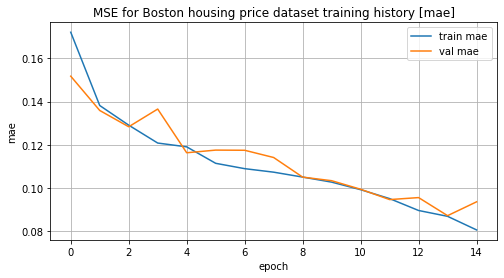

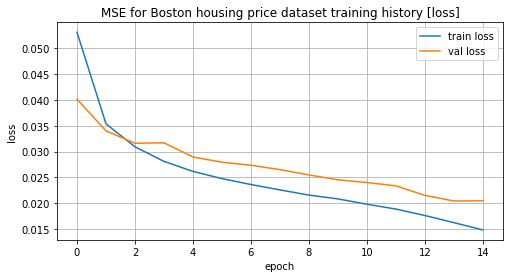

In [34]:
plot_history(history_mse, metrics=["mae"], model_name="MSE for Boston housing price dataset")
plot_history(history_mse, metrics=["loss"], model_name="MSE for Boston housing price dataset")

In [35]:
result_hs_mse = mse.evaluate(X_test, y_test)


4/4 [==============================] - 0s 3ms/step - loss: 0.0128 - mae: 0.0757


#### Cross Entropy Loss function:

In [43]:
cce = Sequential([
    Dense(units=32, input_dim= X.shape[1], activation="relu"),
    Dense(units=16,activation="relu"),
    Dense(units=8, activation="relu"),
    Dense(units=2, activation="softmax")
])
cce.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 32)                448       
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 8)                 136       
                                                                 
 dense_24 (Dense)            (None, 2)                 18        
                                                                 
Total params: 1,130
Trainable params: 1,130
Non-trainable params: 0
_________________________________________________________________


In [44]:
cce.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [49]:
history_cce = cce.fit(X_train, y_train, epochs=20, verbose=0, validation_split=0.2)


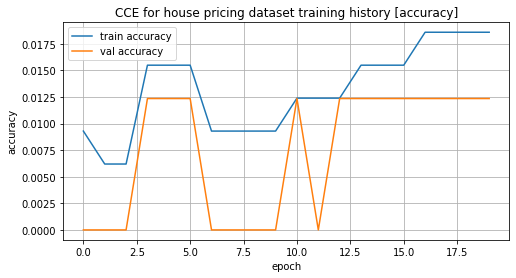

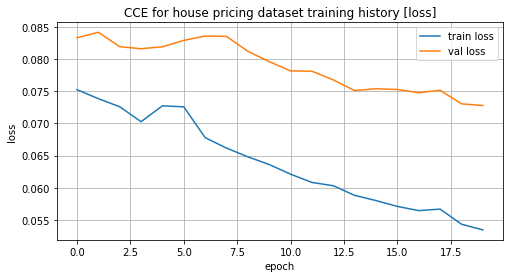

In [50]:
plot_history(history_cce, metrics=["accuracy"], model_name="CCE for house pricing dataset")
plot_history(history_cce, metrics=["loss"],model_name="CCE for house pricing dataset")